In [32]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

In [33]:
# The larger the kernel size, the more blurred the output face will be
# The smaller the kernel size, the less blurred the output face will be

def anonymize_face_simple(image, factor=3.0):
    (h, w) = image.shape[:2]
    kW = int(w / factor)
    kH = int(h / factor)
    if kW%2 == 0 :
        kW-=1    
    if kH%2 == 0:
        kH-=1
    return cv2.GaussianBlur(image, (kW, kH), 0)

def anonymize_face_pixelate(image, blocks=3):
    (h, w) = image.shape[:2]
    xSteps = np.linspace(0, w, blocks + 1, dtype="int")
    ySteps = np.linspace(0, h, blocks + 1, dtype="int")
    
    # loop over the blocks in both the x and y direction
    for i in range(1, len(ySteps)):
        for j in range(1, len(xSteps)):
            # compute the starting and ending (x, y)-coordinates for the current block
            startX = xSteps[j - 1]
            startY = ySteps[i - 1]
            endX = xSteps[j]
            endY = ySteps[i]
            
            roi = image[startY:endY, startX:endX]
            (B, G, R) = [int(x) for x in cv2.mean(roi)[:3]]
            cv2.rectangle(image, (startX, startY), (endX, endY), (B, G, R), -1)
            
    return image            


In [34]:
# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = "C:/Users/Sumi/Downloads/PracticeProbelms/deploy.prototxt"
weightsPath = "C:/Users/Sumi/Downloads/PracticeProbelms/res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNet(prototxtPath, weightsPath)

[INFO] loading face detector model...


In [35]:
image = cv2.imread('sumi.jpeg')
image = cv2.imread('sid.jpeg')

orig = image.copy()
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))

# pass the blob through the network and obtain the face detections
print("[INFO] computing face detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing face detections...


In [36]:
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        face = image[startY:endY, startX:endX]
        
        # method 1
        face = anonymize_face_simple(face, factor=3.0)
        
        # method 2
#         face = anonymize_face_pixelate(face, blocks=args["blocks"])
        
        image[startY:endY, startX:endX] = face

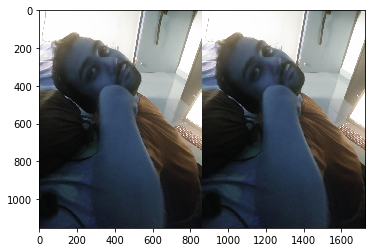

In [37]:
# display the original image and the output image with the blurred face(s) side by side
output = np.hstack([orig, image])
plt.imshow(output, cmap = 'gray')

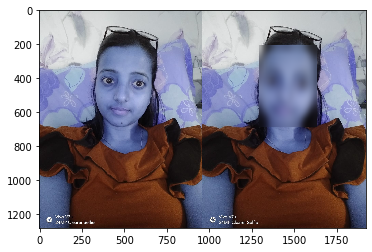

In [28]:
# display the original image and the output image with the blurred face(s) side by side
output = np.hstack([orig, image])
plt.imshow(output, cmap = 'gray')
